Jumlah tiap label:
label
0    635
2    622
1    446
Name: count, dtype: int64


C:\Users\wafts\AppData\Local\Temp\ipykernel_13916\3959692379.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


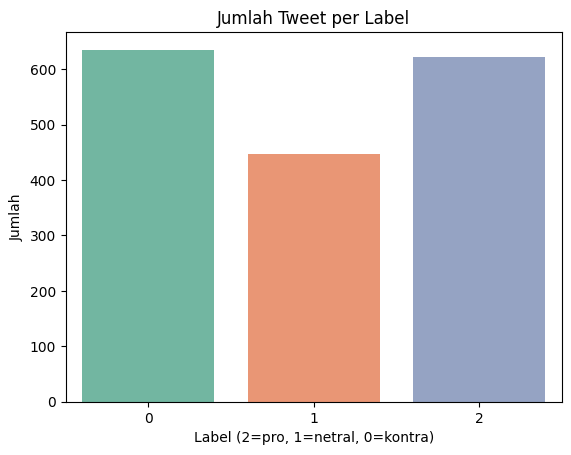

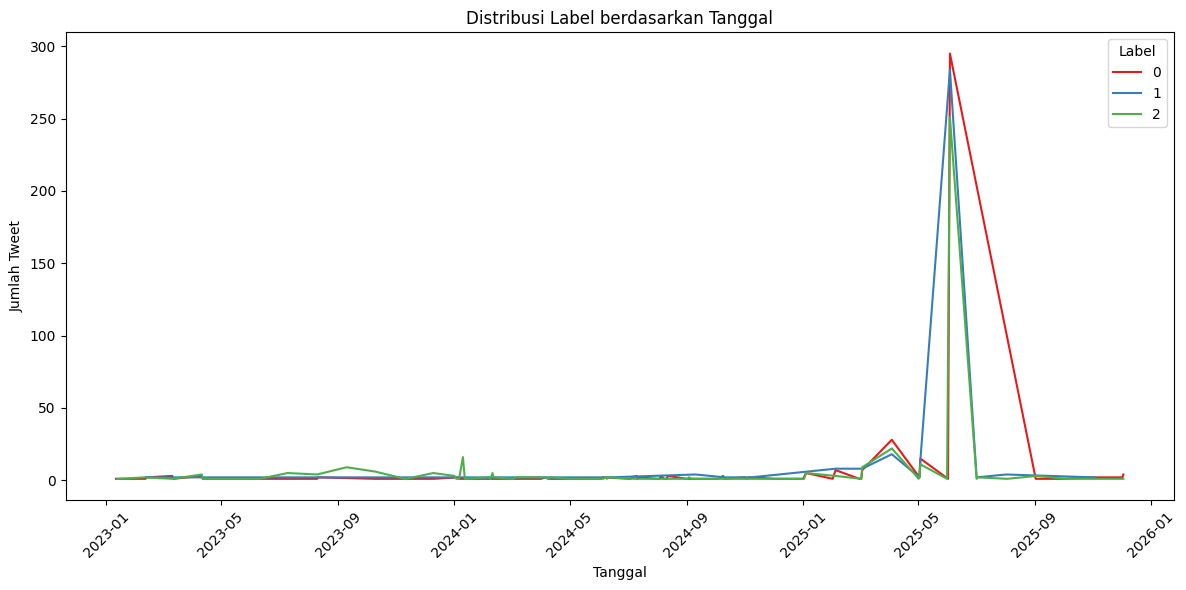

KeyError: 'full_text_processed'

In [7]:
#  1. Setup dan Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Untuk tampilan grafik yang lebih tajam di Jupyter
%matplotlib inline

# 2. Load Data
file_path = "DATA/TRAINING DATASET/Revisi tentiment netral/final_preprocessed_dataset_revisi.csv"
df = pd.read_csv(file_path, delimiter=";")

# Pastikan kolom 'created_at' sudah dalam format tanggal
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# 3. Hitung jumlah label
label_counts = df['label'].value_counts()
print("Jumlah tiap label:")
print(label_counts)

# Visualisasikan jumlah label
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Jumlah Tweet per Label")
plt.xlabel("Label (2=pro, 1=netral, 0=kontra)")
plt.ylabel("Jumlah")
plt.show()

# 4. Grafik jumlah p/n/c berdasarkan tanggal
plt.figure(figsize=(12,6))
df['count'] = 1
daily = df.groupby([df['created_at'], 'label'])['count'].count().reset_index()

sns.lineplot(data=daily, x='created_at', y='count', hue='label', palette='Set1')
plt.title("Distribusi Label berdasarkan Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)
plt.legend(title="Label")
plt.tight_layout()
plt.show()

# 5. Wordcloud untuk setiap label
labels = [0, 1, 2]
label_map = {0: 'KONTRA', 1: 'NETRAL', 2: 'PRO'}

for l in labels:
    text = ' '.join(df[df['label'] == l]['full_text_processed'].dropna().astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud - Label {label_map[l]}')
    plt.show()

# 6. Tabel kata terbanyak per label
def get_top_words(texts, n=10):
    words = ' '.join(texts.dropna().astype(str)).split()
    return Counter(words).most_common(n)

for l in labels:
    print(f"\n🔹 Kata terbanyak di label '{label_map[l]}':")
    top_words = get_top_words(df[df['label'] == l]['full_text_processed'])
    for word, freq in top_words:
        print(f"{word:<15} {freq}")


Visualisasi Dataset 